<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Using Timeseries Data and Datetime

_Authors: Samuel Stack (DC)_

---

This lab covers the basics of manipulating datetime objects and using datetimes in pandas.

### 1. Create a datetime object representing today's date

In [1]:
from datetime import datetime
from datetime import timedelta

# Time this lesson plan was written
lesson_date = datetime(2016, 3, 5, 23, 31, 1, 844089)

In [2]:
lesson_date

datetime.datetime(2016, 3, 5, 23, 31, 1, 844089)

### 2. Write a function to print the day of the week for a datetime object.

In [3]:
# This is similar to what Pandas .dt. already uses.  Neat Ehhh?
def day_of_week(date):
    days_of_week = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'}
    return days_of_week[date.weekday()]

day_of_week(lesson_date)

'saturday'

### 3. What is the Gregorian ordinal representation of today's date? What is the difference in days between the ordinal representation of today's date and the ordinal representation of your birthday?

> *Hint: `.toordinal()` will get you the ordinal representation. This is calculating the number of days between your birthday and today.

In [4]:
datetime.now().toordinal() - datetime(1987, 1, 7).toordinal()

11270

In [5]:
736347/365
# lets see how many years ago it started.

2017.3890410958904

### 4. Try using `timedelta` to shift our datetime object by the following intervals:
- 1 hour ahead
- 3 days ago
- 1 year, 3 days, 2 seconds ahead

In [6]:
print(lesson_date + timedelta(hours=1))

lesson_date - timedelta(days=3)
# OR
print(lesson_date + timedelta(days=-3))
# adding negative days WHATTTT!!!! So Cool! Outrageously Cool!

print(lesson_date + timedelta(days=368, seconds=2))

2016-03-06 00:31:01.844089
2016-03-02 23:31:01.844089
2017-03-08 23:31:03.844089


### 5. Load one of the stock csvs in the datasets folder.

Which you choose is up to you!

In [7]:
import pandas as pd
from datetime import timedelta
%matplotlib inline

# I choose to look at Volkswagon (because they own Bugatti)
df_vow = pd.read_csv('../datasets/vow.csv')

### 6. Take a high-level look at the data. Describe it. What are we looking at? 

Use a plotting function to provide a good visual.

In [8]:
df_vow.describe()

,Open,High,Low,Close,Volume
count,255.000000,255.000000,255.000000,255.000000,255.000000
mean,130.380000,132.168235,128.580588,130.415882,96009.898039
std,7.031538,6.992833,7.398405,7.308949,51570.127117
min,110.950000,111.000000,106.650000,108.950000,18273.000000
25%,127.000000,128.600000,125.275000,126.875000,63276.500000
50%,130.450000,131.950000,128.900000,130.450000,84373.000000
75%,134.475000,136.150000,132.575000,134.600000,114860.500000
max,154.050000,154.300000,149.950000,153.150000,374850.000000


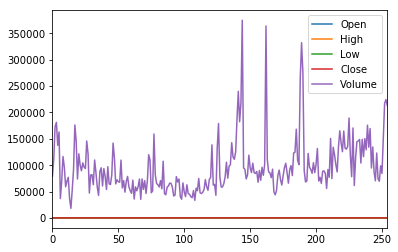

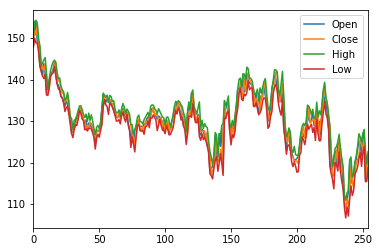

In [9]:
# We're plotting them all at once so... there are going to be some visual issues
df_vow.plot()
# Volume distorts the viz because those values are much larger than the prices.

# lets put all those other ones on a plot.
df_vow[['Open','Close','High','Low']].plot()

### 7. Examine the Date column. Make it the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [10]:
df_vow.head()

,Date,Open,High,Low,Close,Volume
0,16-Jan-17,150.05,150.70,147.75,148.40,79341
1,13-Jan-17,151.85,154.00,149.95,151.75,112464
2,12-Jan-17,154.05,154.30,148.85,150.70,173155
3,11-Jan-17,149.05,153.65,148.80,153.15,181285
4,10-Jan-17,148.05,149.85,146.60,148.10,137786


In [11]:
# The object type in the date column is a bunch of strings.  Or at least the first one is.
df_vow['Date']
type(df_vow['Date'].loc[0])

str

In [12]:
df_vow.set_index('Date', inplace=True)
df_vow.index = pd.to_datetime(df_vow.index)

In [13]:
df_vow.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341
2017-01-13,151.85,154.00,149.95,151.75,112464
2017-01-12,154.05,154.30,148.85,150.70,173155
2017-01-11,149.05,153.65,148.80,153.15,181285
2017-01-10,148.05,149.85,146.60,148.10,137786


### 8. Add columns with useful data extracted from the DateTime index.

Make at least three columns, one for day, month, and year.


In [14]:
df_vow['Year'] = df_vow.index.year
df_vow['Month'] = df_vow.index.month
df_vow['Day'] = df_vow.index.day

In [15]:
df_vow.head()

,Open,High,Low,Close,Volume,Year,Month,Day
Date,,,,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341,2017,1,16
2017-01-13,151.85,154.00,149.95,151.75,112464,2017,1,13
2017-01-12,154.05,154.30,148.85,150.70,173155,2017,1,12
2017-01-11,149.05,153.65,148.80,153.15,181285,2017,1,11
2017-01-10,148.05,149.85,146.60,148.10,137786,2017,1,10


### 9. Create a subset of the data containing only 2017 dates.

In [16]:
df_vow['2017']

,Open,High,Low,Close,Volume,Year,Month,Day
Date,,,,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341,2017,1,16
2017-01-13,151.85,154.00,149.95,151.75,112464,2017,1,13
2017-01-12,154.05,154.30,148.85,150.70,173155,2017,1,12
2017-01-11,149.05,153.65,148.80,153.15,181285,2017,1,11
2017-01-10,148.05,149.85,146.60,148.10,137786,2017,1,10
2017-01-09,143.20,148.15,143.20,148.05,163025,2017,1,9
2017-01-06,142.60,143.25,141.85,142.60,36778,2017,1,6
2017-01-05,141.00,144.00,140.85,143.25,69801,2017,1,5
2017-01-04,143.85,144.75,140.25,142.05,116569,2017,1,4


### 10. [Example] Date ranges and frequencies.

Explore the following built-in methods:
- What does `asfreq` do?
> - _Convert TimeSeries to specified frequency._

- What does `resample` do?
> - _Convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword._

We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.


In [17]:
index = pd.date_range('3/1/2016', '6/1/2016')

# Specifify a start point and how many periods after
pd.date_range(start='3/1/2016', periods=20)

#Specify a end point and how many periods before
pd.date_range(end='6/1/2016', periods=20)

# Frequency specifyins the length of the periods the default 'D' being daily.  I imagine BM is Bi-Monthly
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

pd.date_range('3/7/2016 12:56:31', periods=6)
# normalize creates normal daily times, and will make the default time for each day midnight.
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=True)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12'],
              dtype='datetime64[ns]', freq='D')

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

In [18]:
# March 2016 was our start period, and the period frequency is months.
march_2016 = pd.Period('2016-03', freq='M')

print(march_2016.start_time)
print(march_2016.end_time)

2016-03-01 00:00:00
2016-03-31 23:59:59.999999999
